In [1]:
VARIANT_NUM = 1

# LSTM Model for Sarcasm Detection

#### Goal of This File:

##### 1. Import Libraries, Helper Functions, and Constants ==> Data Sourcing and Munging ==> Utility Functions ==> Loading the Data ==> Merging all Individual Files

##### 2. Data Processing

##### 3. Bidirectional LSTM

##### 4. Conclusion ==> Results ==> Tensorboard

## 1. Import Libraries, Helper Functions and Load Constants

In [2]:
!pip install pandas numpy nltk scikit-learn wordcloud\
seaborn gensim tensorflow imblearn xgboost matplotlib unrar pyunpack more-itertools patool > /dev/null


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
VAST = True

if VAST:
    !sudo apt-get install unrar
    !sudo apt-get install rar

GDRIVE = True

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.6.6-2build1).
0 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
rar is already the newest version (2:5.5.0-1build1).
0 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.


In [4]:
UTILS_URL = 'https://f005.backblazeb2.com/file/gp-support-files/archived_nlp_ai_utils.py'
UPDATING_VALUES_URL = 'https://f005.backblazeb2.com/file/gp-support-files/archived_updating_values.py'
ALL_LIBS_URL = 'https://f005.backblazeb2.com/file/gp-support-files/archived_all_libs_dl.py'
CHUNKS_URLS_FILE_URL = 'https://f005.backblazeb2.com/file/gp-support-files/chunks_urls.py'

UTILS_FILE_NAME = 'archived_nlp_ai_utils'
UPDATING_VALUES_FILE_NAME = 'archived_updating_values'
ALL_LIBS_FILE_NAME = 'archived_all_libs_dl'
CHUNKS_URLS_FILE_NAME = 'sd_chunks_urls'

DEP_FILE_EXT = '.py'

In [5]:
import requests
import os

def get_dependencies(url,file_name,file_extension):
    if os.path.exists(file_name + file_extension):
        return print(file_name + " already exists.")
    else:
        print(f"downloading {file_name}...")
        r = requests.get(url)
        with open(file_name + file_extension, 'wb') as fd:
            for chunk in r.iter_content():
                fd.write(chunk)

In [6]:
get_dependencies(UTILS_URL,UTILS_FILE_NAME,DEP_FILE_EXT)
get_dependencies(UPDATING_VALUES_URL,UPDATING_VALUES_FILE_NAME,DEP_FILE_EXT)
get_dependencies(ALL_LIBS_URL,ALL_LIBS_FILE_NAME,DEP_FILE_EXT)
get_dependencies(CHUNKS_URLS_FILE_URL,CHUNKS_URLS_FILE_NAME,DEP_FILE_EXT)

archived_nlp_ai_utils already exists.
archived_updating_values already exists.
archived_all_libs_dl already exists.
sd_chunks_urls already exists.


In [7]:
from archived_nlp_ai_utils import *
from sd_chunks_urls import SD_CHUNKS_URLS
from archived_updating_values import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2023-06-08 20:28:22.629265: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
TF_ENABLE_ONEDNN_OPTS = 0
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
DATA_URLS = SD_CHUNKS_URLS
GLOVE_URL = 'https://f005.backblazeb2.com/file/glove-embeddings-dims/glove.6B.100d.txt'
LIMIT = 10
TRAINED_MODELS_COUNT = TRAINED_MODELS

if GDRIVE:
    PICKLES_DIR = 'sd_pickle_files'
    DATA_PATH = 'datasets'
    GLOVE_FILES_DIR = 'glove_files'
    SAVED_MODELS_DIR = 'sd_saved_models'
else:
    PICKLES_DIR = '../sd_pickle_files'
    DATA_PATH = '../datasets'
    GLOVE_FILES_DIR = '../glove_files'
    SAVED_MODELS_DIR = '../sd_saved_models'

PREPROCESSED_CHUNKS_PATH = DATA_PATH + "/preprocessed_sd_data_chunks/"
PROCESSED_DATA_DIR = DATA_PATH + "/processed_data/"
BASE_FILE_NAME = "sd_chunk_"
FILE_FORMAT = ".csv"
DATA_IN_CHUNK = 99744
if LIMIT == 10:
    ACTUAL_DATA_SHAPE = DATA_IN_CHUNK * LIMIT - 2
else:
    ACTUAL_DATA_SHAPE = DATA_IN_CHUNK * LIMIT
RANDOM_STATE = CONST_RANDOM_STATE
DELETE_PICKLES_AFTER_TRAINING = True

### 1.1 Data Sourcing and Munging

#### 1.1.1 Loading The Data

In [9]:
if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH)
if not os.path.exists(PREPROCESSED_CHUNKS_PATH):
    os.mkdir(PREPROCESSED_CHUNKS_PATH)
get_chunks(DATA_URLS,LIMIT,1,BASE_FILE_NAME,PREPROCESSED_CHUNKS_PATH,FILE_FORMAT)

sd_chunk_1 already exists.
sd_chunk_2 already exists.
sd_chunk_3 already exists.
sd_chunk_4 already exists.
sd_chunk_5 already exists.
sd_chunk_6 already exists.
sd_chunk_7 already exists.
sd_chunk_8 already exists.
sd_chunk_9 already exists.
sd_chunk_10 already exists.


#### 1.1.2 Merging all Individual Files

In [10]:
#get all names of downloaded files
all_file_names = get_all_file_names(BASE_FILE_NAME,LIMIT)

In [11]:
#read all chunks into a list
list_dfs = read_chunks(all_file_names,PREPROCESSED_CHUNKS_PATH,FILE_FORMAT)

In [12]:
#concatenate all chunks into a singular df
df = group_up_chunks(list_dfs)

In [13]:
#check how much of the data was actually downloaded
percent_loaded = check_no_missing_data(df.shape[0],ACTUAL_DATA_SHAPE)
percent_loaded

100.0

In [14]:
df.reset_index(inplace = True)
df.drop(['index'],axis = 1,inplace = True)

In [15]:
df.isnull().sum()

text      4331
labels       0
dtype: int64

In [16]:
df.dropna(inplace = True)

In [17]:
df['text'].replace('', np.nan, inplace=True)
df.dropna(inplace = True)

In [18]:
df.isnull().sum()

text      0
labels    0
dtype: int64

## 2. Data Processing

In [19]:
X = df['text']
y = df['labels']

In [20]:
X = pd.Series([str(text) for text in X])

### 2.2 GloVe + Hyperparameters

In [21]:
if not os.path.exists(GLOVE_FILES_DIR):
    os.mkdir(GLOVE_FILES_DIR)

In [22]:
get_chunks([GLOVE_URL],0,1,"glove.6B.100d",GLOVE_FILES_DIR + '/','.txt',False)

glove.6B.100d already exists.


In [23]:
print('Getting Unique Words...')
UNIQUE_WORDS = set(' '.join(X).split())

Getting Unique Words...


### Hyperparameters

In [24]:
VOCAB_SIZE = len(UNIQUE_WORDS)
LSTM_UNITS = 128
DENSE_UNITS = 1024
LABELS_COUNT = 1
EMBEDDING_DIM = 100
MAX_TEXT_LEN = 150
CONV_FILTERS = 60
CONV_KERNEL_SIZE = 5
DROPOUT_VAL = 0.2
TRUNC_TYPE = 'post'
PADDING_TYPE = 'post'
OOV_TOKEN = "<OOV>"
BATCH_SIZE = 128
EPOCHS = 150

##### ==> here is a quick explaination of how the dataset will be split using a smaller sample example.
##### ==> dataset => 100
##### ==> train_set => tr_s (example: 80)
##### ==> valid_set => vs (example: 10)
##### ==> test_set => te_s (example: 10)
##### ==> t = tr_s (80) + vs (10)
##### ==> train_set = x[:80]
##### ==> valid_set = x[80:t]
##### ==> test_set = x[t:] why t? because => vs = ts

##### use this guideline if you are confused about how the train-validation-test split was done. Also, this is a future guide for me as well in case I forget.

* train_set_size = 6,990,280 * 0.8 = 5,592,224
* valid_set_size = 6,990,280 * 0.1 = 699,028
* train_plus_valid = 5,592,224 + 699,028 = 6,291,252

==> To Confirm: test_size = 6,990,280 - 6,291,252 = 699,028

* train_set = [0:5,592,224]
* train_labels = [0:5,592,224]
* validation_set = [5,592,224:6,291,252] ==> 699,028
* validation_labels = [5,592,224:6,291,252] ==> 699,028
* test_set = [6,291,252,6,990,280] ==> 699,028
* test_labels = [6,291,252,6,990,280] ==> 699,028

In [25]:
TRAIN_PERCENT = 0.8
VALID_TEST_PERCENT = 0.1
TRAIN_SIZE = int(ACTUAL_DATA_SHAPE * TRAIN_PERCENT)
VALID_TEST_SIZE = int(ACTUAL_DATA_SHAPE * VALID_TEST_PERCENT)
TOTAL_TEST_SIZE = TRAIN_SIZE + VALID_TEST_SIZE
train_set = X[:TRAIN_SIZE]
train_labels = y[:TRAIN_SIZE]
validation_set = X[TRAIN_SIZE:TOTAL_TEST_SIZE]
validation_labels = y[TRAIN_SIZE:TOTAL_TEST_SIZE]
test_set = X[TOTAL_TEST_SIZE:]
test_labels = y[TOTAL_TEST_SIZE:]

In [26]:
validation_set.reset_index(drop=True,inplace=True)
test_set.reset_index(drop=True,inplace=True)

In [27]:
if not os.path.exists(PROCESSED_DATA_DIR):
    os.mkdir(PROCESSED_DATA_DIR)

In [28]:
# NOTE: THIS CELL TAKES A WHILE TO RUN.
if not os.path.exists(PROCESSED_DATA_DIR + "train_set_padded.pickle"):
    print("Tokenizing the Dataset...")
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN)
    tokenizer.fit_on_texts(train_set)
    words_to_index = tokenizer.word_index

Tokenizing the Dataset...


In [29]:
# NOTE: THIS CELL TAKES A WHILE TO RUN.
if not os.path.exists(PROCESSED_DATA_DIR + "train_set_padded.pickle"):
    print("Padding the Training Set.")
    train_sequences = tokenizer.texts_to_sequences(train_set)
    train_set_padded = pad_sequences(train_sequences,value=0.0, maxlen=MAX_TEXT_LEN, padding=PADDING_TYPE, truncating=TRUNC_TYPE)
    
if not os.path.exists(PROCESSED_DATA_DIR + "valid_set_padded.pickle"):
    print("Padding the Validation Set.")
    valid_sequences = tokenizer.texts_to_sequences(validation_set)
    valid_set_padded = pad_sequences(valid_sequences,value=0.0, maxlen=MAX_TEXT_LEN, padding=PADDING_TYPE, truncating=TRUNC_TYPE)
    
if not os.path.exists(PROCESSED_DATA_DIR + "test_set_padded.pickle"):
    print("Padding the Testing Set.")
    test_sequences = tokenizer.texts_to_sequences(test_set)
    test_set_padded = pad_sequences(test_sequences,value=0.0, maxlen=MAX_TEXT_LEN, padding=PADDING_TYPE, truncating=TRUNC_TYPE)

Padding the Training Set.
Padding the Validation Set.
Padding the Testing Set.


In [30]:
if not os.path.exists(PROCESSED_DATA_DIR + "train_set_padded.pickle"):
    print("Re-formatting Train Set Shape.")
    train_set_padded = np.array(train_set_padded)
    
if not os.path.exists(PROCESSED_DATA_DIR + "train_labels.pickle"):
    print("Re-formatting Train Labels Shape.")
    train_labels = np.array(train_labels)
    
if not os.path.exists(PROCESSED_DATA_DIR + "valid_set_padded.pickle"): 
    print("Re-formatting Validation Set Shape.")
    valid_set_padded = np.array(valid_set_padded)

if not os.path.exists(PROCESSED_DATA_DIR + "validation_labels.pickle"):
    print("Re-formatting Validation Labels Shape.")
    validation_labels = np.array(validation_labels)

if not os.path.exists(PROCESSED_DATA_DIR + "test_set_padded.pickle"):
    print("Re-formatting Testing Set Shape.")
    test_set_padded = np.array(test_set_padded)

if not os.path.exists(PROCESSED_DATA_DIR + "test_labels.pickle"):
    print("Re-formatting Testing Labels Shape.")
    test_labels = np.array(test_labels)

Re-formatting Train Set Shape.
Re-formatting Train Labels Shape.
Re-formatting Validation Set Shape.
Re-formatting Validation Labels Shape.
Re-formatting Testing Set Shape.
Re-formatting Testing Labels Shape.


In [31]:
word_to_vec_map = read_glove_vector(GLOVE_FILES_DIR + '/glove.6B.100d.txt')

In [32]:
if not os.path.exists(PROCESSED_DATA_DIR + "EMBEDDING_LAYER.pickle") :
    print("Generating Embedding From Scratch.")
    vocab_mapping = len(words_to_index)
    embed_vector_len = word_to_vec_map['moon'].shape[0]

    emb_matrix = np.zeros((vocab_mapping, embed_vector_len))

    for word, index in words_to_index.items():
        embedding_vector = word_to_vec_map.get(word)
        if embedding_vector is not None:
            emb_matrix[index, :] = embedding_vector

    EMBEDDING_LAYER = Embedding(input_dim=vocab_mapping,\
                                output_dim=embed_vector_len, input_length=MAX_TEXT_LEN, weights = [emb_matrix], trainable=True)

Generating Embedding From Scratch.


In [33]:
if os.path.exists(PROCESSED_DATA_DIR + "train_set_padded.pickle") :
    print("Using Pickle File!")
    train_set_padded = pickle.load(open(PROCESSED_DATA_DIR + "train_set_padded.pickle", "rb"))
else:
    pickle_out = open(PROCESSED_DATA_DIR + "train_set_padded.pickle",'wb')
    pickle.dump(train_set_padded,pickle_out)
    pickle_out.close()
    
if os.path.exists(PROCESSED_DATA_DIR + "train_labels.pickle") :
    print("Using Pickle File!")
    train_labels = pickle.load(open(PROCESSED_DATA_DIR + "train_labels.pickle", "rb"))
else:
    pickle_out = open(PROCESSED_DATA_DIR + "train_labels.pickle",'wb')
    pickle.dump(train_labels,pickle_out)
    pickle_out.close()

In [34]:
if os.path.exists(PROCESSED_DATA_DIR + "valid_set_padded.pickle") :
    print("Using Pickle File!")
    valid_set_padded = pickle.load(open(PROCESSED_DATA_DIR + "valid_set_padded.pickle", "rb"))
else:
    pickle_out = open(PROCESSED_DATA_DIR + "valid_set_padded.pickle",'wb')
    pickle.dump(valid_set_padded,pickle_out)
    pickle_out.close()
    
if os.path.exists(PROCESSED_DATA_DIR + "validation_labels.pickle") :
    print("Using Pickle File!")
    validation_labels = pickle.load(open(PROCESSED_DATA_DIR + "validation_labels.pickle", "rb"))
else:
    pickle_out = open(PROCESSED_DATA_DIR + "validation_labels.pickle",'wb')
    pickle.dump(validation_labels,pickle_out)
    pickle_out.close()

In [35]:
if os.path.exists(PROCESSED_DATA_DIR + "test_set_padded.pickle") :
    print("Using Pickle File!")
    test_set_padded = pickle.load(open(PROCESSED_DATA_DIR + "test_set_padded.pickle", "rb"))
else:
    pickle_out = open(PROCESSED_DATA_DIR + "test_set_padded.pickle",'wb')
    pickle.dump(test_set_padded,pickle_out)
    pickle_out.close()
    
if os.path.exists(PROCESSED_DATA_DIR + "test_labels.pickle") :
    print("Using Pickle File!")
    test_labels = pickle.load(open(PROCESSED_DATA_DIR + "test_labels.pickle", "rb"))
else:
    pickle_out = open(PROCESSED_DATA_DIR + "test_labels.pickle",'wb')
    pickle.dump(test_labels,pickle_out)
    pickle_out.close()

In [36]:
if os.path.exists(PROCESSED_DATA_DIR + "EMBEDDING_LAYER.pickle") :
    print("Using Pickle File!")
    EMBEDDING_LAYER = pickle.load(open(PROCESSED_DATA_DIR + "EMBEDDING_LAYER.pickle", "rb"))
else:
    print("Pickling Embedding Layer!")
    pickle_out = open(PROCESSED_DATA_DIR + "EMBEDDING_LAYER.pickle",'wb')
    pickle.dump(EMBEDDING_LAYER,pickle_out)
    pickle_out.close()

Pickling Embedding Layer!


## 3. LSTM

The requirements to use the cuDNN implementation are:

* activation == tanh
* recurrent_activation == sigmoid
* recurrent_dropout == 0
* unroll is False
* use_bias is True
* Inputs, if use masking, are strictly right-padded.
* Eager execution is enabled in the outermost context.

In [37]:
configproto = tf.compat.v1.ConfigProto() 
configproto.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=configproto) 
tf.compat.v1.keras.backend.set_session(sess)

tf.keras.backend.clear_session()
tf.random.set_seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)
inputs = tf.keras.Input(shape=(MAX_TEXT_LEN,))
x = EMBEDDING_LAYER(inputs)
x = tf.keras.layers.Dropout(DROPOUT_VAL)(x)
x = tf.keras.layers.Conv1D(filters=CONV_FILTERS, kernel_size=CONV_KERNEL_SIZE, padding='same')(x)
x = tf.keras.layers.GlobalMaxPooling1D(keepdims=True)(x)
x = tf.keras.layers.BatchNormalization(synchronized=True)(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_UNITS))(x)
x = tf.keras.layers.Dense(DENSE_UNITS)(x)
outputs = tf.keras.layers.Dense(LABELS_COUNT, activation="sigmoid")(x)

lstm_model = tf.keras.Model(inputs=inputs, outputs=outputs)

2023-06-08 20:28:50.401055: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-08 20:28:50.407812: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-08 20:28:50.408340: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

2023-06-08 20:28:51.081243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-08 20:28:51.081663: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-08 20:28:51.081991: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [38]:
lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 100)          12575700  
                                                                 
 dropout (Dropout)           (None, 150, 100)          0         
                                                                 
 conv1d (Conv1D)             (None, 150, 60)           30060     
                                                                 
 global_max_pooling1d (Globa  (None, 1, 60)            0         
 lMaxPooling1D)                                                  
                                                                 
 batch_normalization (BatchN  (None, 1, 60)            240       
 ormalization)                                               

In [39]:
log_dir = "sd_logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [40]:
metrics_callback = MetricsCallback(test_data = valid_set_padded, y_true = validation_labels)

In [41]:
lstm_model.compile(optimizer=Adam(learning_rate = 1e-5,amsgrad = True), loss = BinaryCrossentropy(), metrics=['accuracy','Recall','Precision'])
history = lstm_model.fit(train_set_padded, train_labels,validation_data = (valid_set_padded,validation_labels),\
                    batch_size=BATCH_SIZE, epochs=EPOCHS,\
                             callbacks=[tensorboard_callback,EarlyStopping(patience=8,min_delta=0.0005,mode='min',verbose = 1,restore_best_weights=True,monitor='val_loss'),ReduceLROnPlateau(monitor="val_loss",mode = 'min',factor=0.1,verbose = 1,min_delta=0.0005,patience=3)])

Epoch 1/150


2023-06-08 20:28:52.189794: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-08 20:28:52.190819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-08 20:28:52.191556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6234/6234 [==============================] - ETA: 0s - loss: 0.6706 - accuracy: 0.5826 - recall: 0.5331 - precision: 0.5834

2023-06-08 20:30:10.117749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-08 20:30:10.119117: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-08 20:30:10.119808: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

6234/6234 [==============================] - 80s 12ms/step - loss: 0.6706 - accuracy: 0.5826 - recall: 0.5331 - precision: 0.5834 - val_loss: 0.6463 - val_accuracy: 0.6237 - val_recall: 0.5493 - val_precision: 0.6929 - lr: 1.0000e-05
Epoch 2/150
6234/6234 [==============================] - 47s 8ms/step - loss: 0.6516 - accuracy: 0.6133 - recall: 0.5592 - precision: 0.6189 - val_loss: 0.6329 - val_accuracy: 0.6370 - val_recall: 0.5482 - val_precision: 0.7157 - lr: 1.0000e-05
Epoch 3/150
6234/6234 [==============================] - 46s 7ms/step - loss: 0.6416 - accuracy: 0.6259 - recall: 0.5634 - precision: 0.6357 - val_loss: 0.6248 - val_accuracy: 0.6447 - val_recall: 0.5489 - val_precision: 0.7287 - lr: 1.0000e-05
Epoch 4/150
6234/6234 [==============================] - 45s 7ms/step - loss: 0.6342 - accuracy: 0.6349 - recall: 0.5666 - precision: 0.6479 - val_loss: 0.6172 - val_accuracy: 0.6515 - val_recall: 0.5499 - val_precision: 0.7405 - lr: 1.0000e-05
Epoch 5/150
6234/6234 [========

In [43]:
if not os.path.exists(SAVED_MODELS_DIR):
    os.mkdir(SAVED_MODELS_DIR)

In [44]:
TRAINED_MODELS_COUNT = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
if VARIANT_NUM == 0:
    lstm_model.save_weights(SAVED_MODELS_DIR + "/sd_lstm_model_base" + ".h5")
else:
    lstm_model.save_weights(SAVED_MODELS_DIR + "/sd_lstm_model_variant_" + str(VARIANT_NUM) + ".h5")

In [45]:
if VARIANT_NUM == 0:
    pickle_out = open(SAVED_MODELS_DIR + "/sd_lstm_model_params_base" + ".pickle",'wb')
else:
    pickle_out = open(SAVED_MODELS_DIR + "/sd_lstm_model_params_" + str(VARIANT_NUM) + ".pickle",'wb')
pickle.dump({'EMBEDDING_DIM':EMBEDDING_DIM,'MAX_TEXT_LEN':MAX_TEXT_LEN,'BATCH_SIZE':BATCH_SIZE,'EPOCHS':EPOCHS,\
             'train_set_size':len(train_set),'optimizer':str(lstm_model.optimizer),\
             'learning_rate':str(lstm_model.optimizer.learning_rate),\
             'conv_filters':CONV_FILTERS,'conv_kernel':CONV_KERNEL_SIZE,\
             'chunks_used':(len(train_set) + len(validation_set) + len(test_set)) // DATA_IN_CHUNK,\
            'LSTM_UNITS':LSTM_UNITS,'DENSE_UNITS':DENSE_UNITS,'LABELS_COUNT':LABELS_COUNT},pickle_out)
pickle_out.close()

In [46]:
np.save(SAVED_MODELS_DIR + "/" + 'sd_lstm_model_' + str(VARIANT_NUM) + '.npy',history.history)

## 4. Conclusion

In [47]:
if VAST:
    !tar -czf sd_lstm_model_variant_one_logs.tar.gz logs

In [48]:
if DELETE_PICKLES_AFTER_TRAINING:
    if GDRIVE:
        !rm -r datasets/processed_data
    else:
        !rm -r ../datasets/processed_data

In [49]:
results = lstm_model.evaluate(test_set_padded, test_labels)
print("test loss, test acc:", results[:2])

2982/2982 [==============================] - 8s 3ms/step - loss: 0.5552 - accuracy: 0.7117 - recall: 0.6683 - precision: 0.7828
test loss, test acc: [0.5551617741584778, 0.7117089629173279]


### 4.1 Results

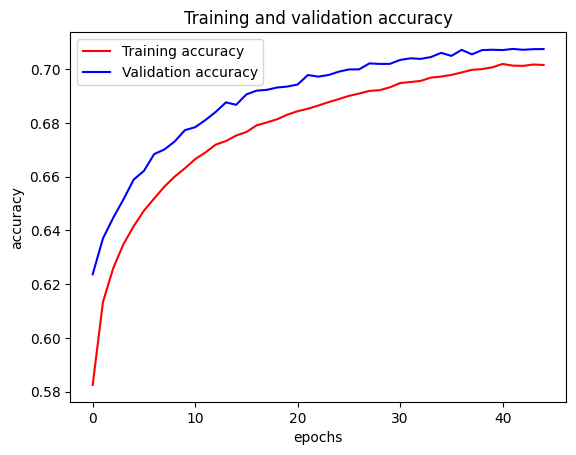

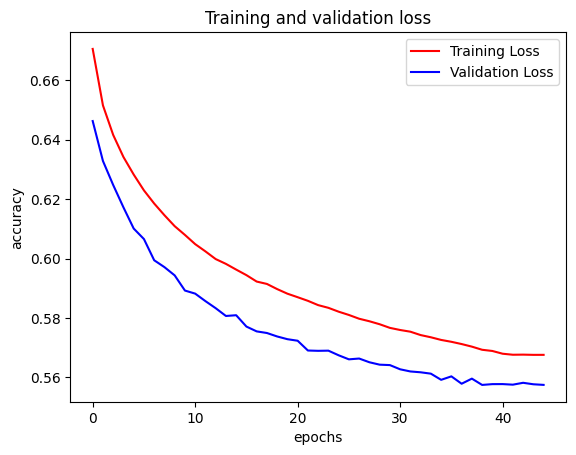

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

### 4.2 Tensorboard

In [51]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit